###importing data


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Preprocessing data

In [37]:
titanic.describe().round(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


In [38]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

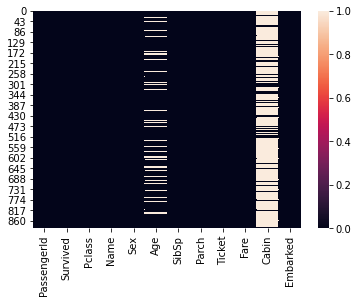

In [39]:
sns.heatmap(titanic.isnull())

In [40]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

<AxesSubplot:>

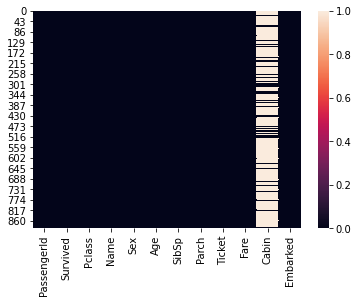

In [41]:
sns.heatmap(titanic.isnull())

In [42]:
titanic.drop('Cabin', axis=1,inplace=True)

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [47]:
emb = pd.get_dummies(titanic['Embarked'])
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [48]:
titanic=pd.concat([titanic,sex,emb],axis=1)

In [49]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,1,0,0


In [50]:
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [51]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [52]:
titanic.rename(columns={'male':'Gender'},inplace=True)

In [53]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


##Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

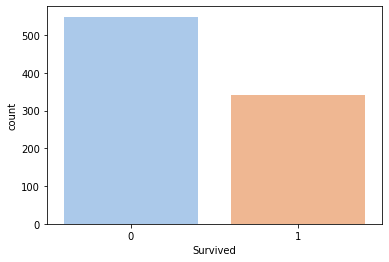

In [54]:
sns.countplot(x='Survived',data=titanic,palette='pastel')

<AxesSubplot:xlabel='Survived', ylabel='count'>

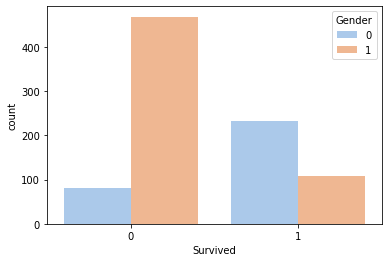

In [55]:
sns.countplot(x='Survived',data=titanic,hue='Gender',palette='pastel')

<AxesSubplot:>

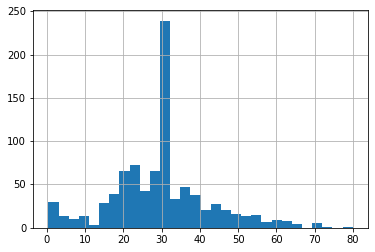

In [56]:
titanic['Age'].hist(bins=30)

<AxesSubplot:>

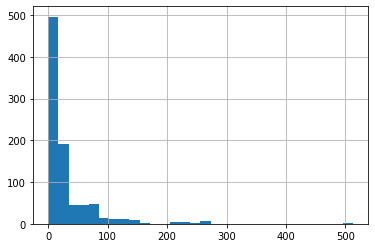

In [58]:
titanic['Fare'].hist(bins=30)

##building our model

In [59]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [60]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1
4,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,1
888,3,29.699118,1,2,23.4500,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,0


In [61]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape

(712, 9)

In [67]:
X_test.shape

(179, 9)

In [68]:
y_train.shape

(712,)

In [69]:
y_test.shape

(179,)

##model training

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(max_iter=5000)


In [72]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [74]:
y_pred =model.predict(X_test)

In [75]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [77]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

###model Evaluate

In [80]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,y_pred)

array([[90, 15],
       [19, 55]], dtype=int64)

In [85]:
90+55/90+55+15+19

179.61111111111111

In [86]:
import pickle

In [88]:
filename='titanic_pred_model'
pickle.dump=open(filename,'wb')